# Linear Regression::
![](info.png)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv( 'ex1data1.txt' )
data_points = df.to_numpy()

In [3]:
X = data_points[:,:1]
Y = data_points[:,1:]

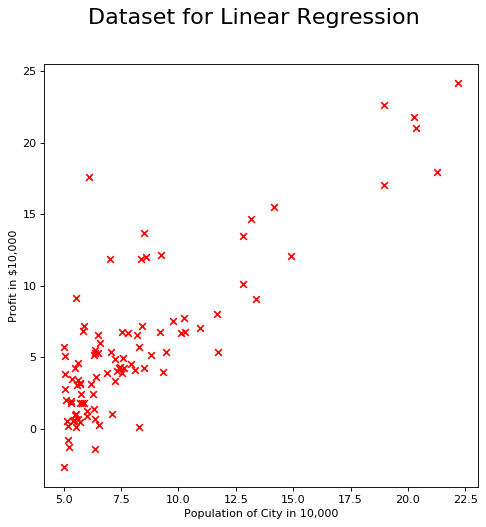

In [4]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Dataset for Linear Regression', fontsize=20)
plt.xlabel('Population of City in 10,000', fontsize=10)
plt.ylabel('Profit in $10,000', fontsize=10)
plt.scatter([i[0] for i in data_points],[i[1] for i in data_points],  marker="x", color='red')

In [5]:
data_points[-1]

array([5.4369 , 0.61705])

In [6]:
ones_for_bias = np.ones((data_points.shape[0], 1))
X_with_bias = np.hstack((X,ones_for_bias))
X_with_bias[0:5]

array([[6.1101, 1.    ],
       [5.5277, 1.    ],
       [8.5186, 1.    ],
       [7.0032, 1.    ],
       [5.8598, 1.    ]])

In [7]:
m = 0
c = 0

L = 0.0001  
epochs = 2000
n = float(len(X))

cost_hist = []
m_hist = []
c_hist = []
pred_hist = []

for i in range(epochs): 

    y_hat = m*X + c

    D_m = (-1/n) * sum(X * (Y - y_hat))
    D_c = (-1/n) * sum(Y - y_hat)
    
    m = m - L * D_m
    c = c - L * D_c
    
    cost_hist.append((1/(2*len(y_hat)))*np.sum( np.square(y_hat - Y) ))
    m_hist.append(m[0])
    c_hist.append(c[0])
    pred_hist.append([[5, 22.5],[ (m*5 + c)[0], (m*22.5 + c)[0]]])
    
m_hist = np.asarray(m_hist)
c_hist = np.asarray(c_hist)
cost_hist = np.asarray(cost_hist)

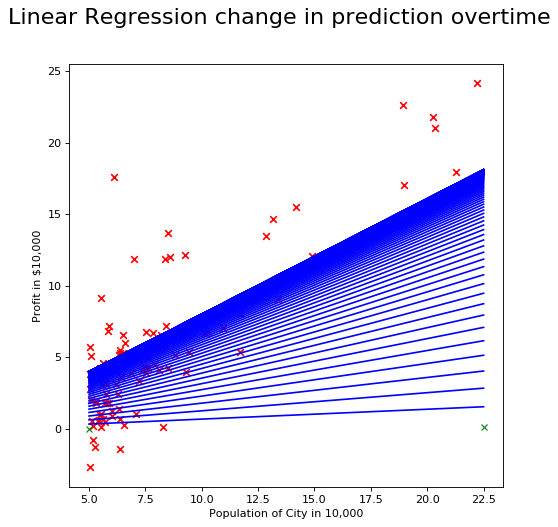

In [8]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Linear Regression change in prediction overtime', fontsize=20)
plt.xlabel('Population of City in 10,000', fontsize=10)
plt.ylabel('Profit in $10,000', fontsize=10)
plt.scatter([i[0] for i in data_points],[i[1] for i in data_points],  marker="x", color='red')
for ind, i in enumerate(pred_hist):
    if ind%10==0:
        if ind==0:
            plt.plot(i[0], i[1], 'gx')
        else:
            plt.plot(i[0], i[1], 'b-')

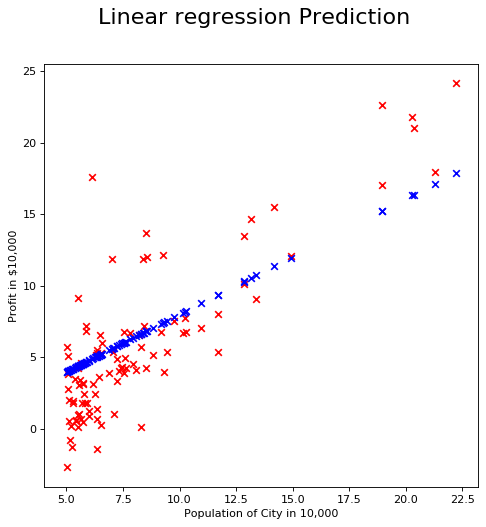

In [9]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Linear regression Prediction', fontsize=20)
plt.xlabel('Population of City in 10,000', fontsize=10)
plt.ylabel('Profit in $10,000', fontsize=10)
plt.scatter([i[0] for i in data_points],[i[1] for i in data_points],  marker="x", color='red')
plt.scatter(X, m*X + c, marker="x", color='blue')

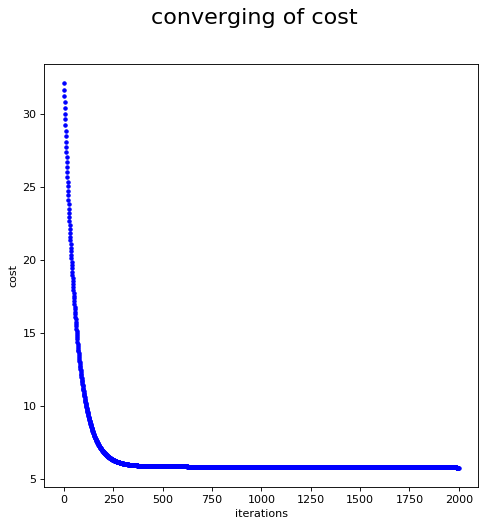

In [10]:
fig = plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('converging of cost', fontsize=20)
plt.xlabel('iterations', fontsize=10)
plt.ylabel('cost', fontsize=10)
plt.scatter([i for i in range(2000)], cost_hist, marker=".", color='blue')

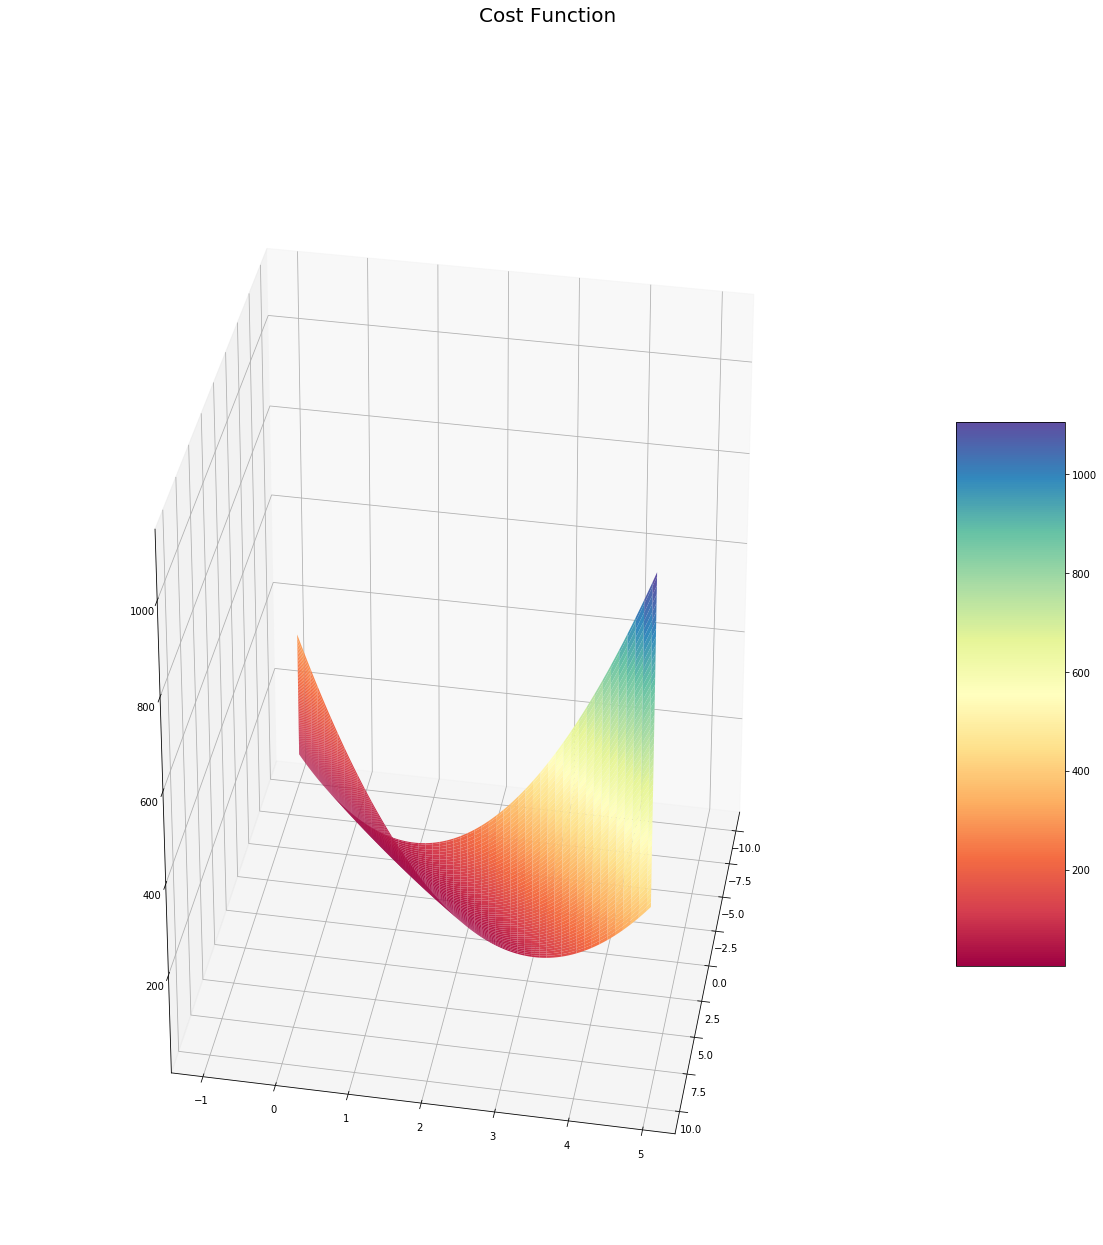

In [12]:
from mpl_toolkits.mplot3d import Axes3D

c=np.linspace(-10,10,100)
m=np.linspace(-1,5,100)

cost_surf =np.zeros((len(c),len(m)))

for i in range(len(c)):
    for j in range(len(m)):
        cost_surf[i,j]=1/(2*len(X)) * np.sum((X*m[j] + c[i] - Y)**2)

fig = plt.figure(figsize=(20,20))
fig.suptitle('Cost Function', fontsize=20)
ax = plt.axes(projection='3d')

surf=ax.plot_surface(c,m,cost_surf,cmap='Spectral')

fig.colorbar(surf, shrink=0.5, aspect=5)
# rotate the axes and update
ax.view_init(30, 10)
plt.show()